# Titanic: Machine Learning from Disaster

This notebook focuses on analysing the Titanic data set for correctly predicting the survival rate of the passengers of the titanic using the Kaggel's Titanic challenge dataset.

In this notebook, we'll take a look at how the data is organized, what features represent the training data and which ones would be the most useful for a classification model to predict if a person would be likely to survive the trip or not.


### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

### Load the Titanic data set

In [3]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

### See how the data is formatted (data types, fields)

In [4]:
# check out a sample of the DataFrame
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# check the data types, number of entries and missing values present in the DataFrame 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# Get some statistics of the training data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### About the data

The training data of the dataset is formated as the following table:


| Variable | Definition | Key |
|---|---|---|
| PassengerId | Passenger Id | |
| Survival | Survival | 0 = No, 1 = Yes |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Sex | Sex	| |
| Age | Age in years |
| Sibsp	| # of siblings / spouses aboard the Titanic | |
| Parch	| # of parents / children aboard the Titanic | |
| Ticket | Ticket number | | 
| Fare | Passenger fare	| |
| Cabin | Cabin number | |
| Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

This dataset is rather small: the training data is composed of around 900 entry points. 

From these fields, only 3 have missing values (Age, Cabin and Embarked). This means that it is required to address the missing data before proceeding to fit a model with it.

About half of the fields are in numeric format and the other half are categorical data (strings). Converting the categorical data is required before proceeding to fit a model with this data.

To understand which fields are useful and which are not, additional analysis are required to better understand the data. Next, we proceed with some data visualizations/plotting to aid us in gathering more insights about this dataset.  

### Data visualizations

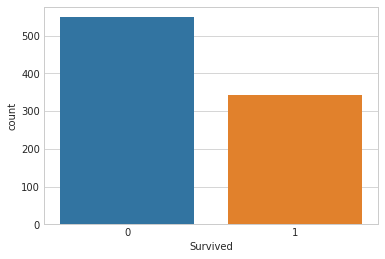

In [8]:
# first, lets count how many passengers survived vs perished
sns.countplot(data=train_df, x='Survived')

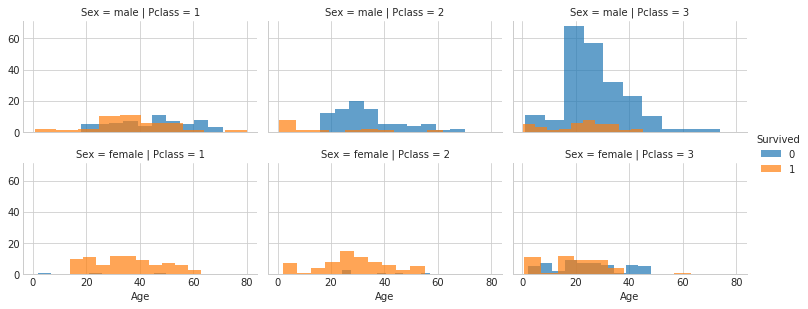

In [9]:
# Next, lets check and see the survival rate of the passenger's sex vs class vs age
g = sns.FacetGrid(data=train_df, row='Sex', col='Pclass', size=2.2, aspect=1.6, hue='Survived')
g.map(plt.hist, "Age", alpha=0.7, bins=10)
g.add_legend()

#### Note1

From the previous graph, the **Sex**, **Age** and **Passenger class** columns seem to be good indicators to access the **survival rate** of a passenger on the titanic.

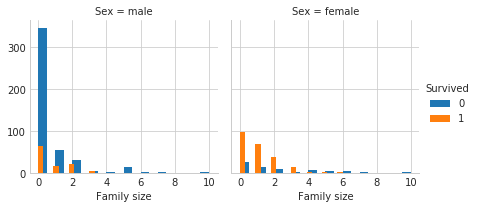

In [10]:
# Now lets see if the family size (number of siblings + number of parents) might influence the survival rate
train_df['Family size'] = train_df['SibSp'] + train_df['Parch']
g = sns.FacetGrid(train_df, col='Sex', hue='Survived')
g.map(plt.hist, "Family size", bins=20)
g.add_legend()

#### Note2

There seems to be that many of the passengers went alone on the trip and the majority were males. The size of the family looks to be a good feature for predicting the survival rate of a passenger.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


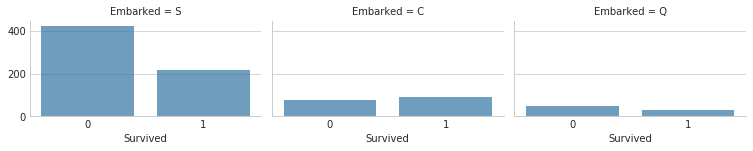

In [11]:
# Lets check out the embarked field 
g = sns.FacetGrid(train_df, col="Embarked", size=2.2, aspect=1.6)
g.map(sns.countplot, "Survived", alpha=0.7)

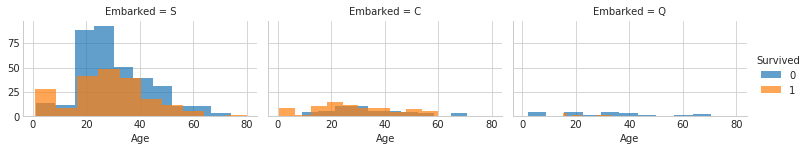

In [12]:
# Lets get more detail about the distribution using the Age field
g = sns.FacetGrid(train_df, col="Embarked", hue='Survived', size=2.2, aspect=1.6)
g.map(plt.hist, "Age", alpha=0.7)
g.add_legend()

#### Note3

The **Embarked** field is also a good candidate field for accessing the survival rate of a passenger.

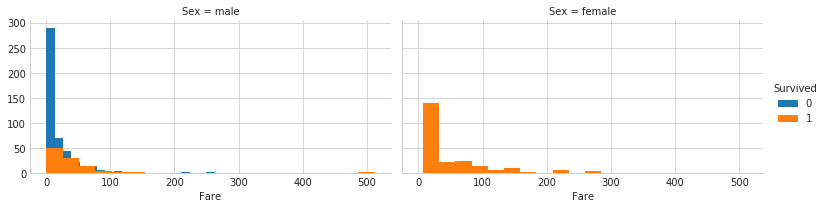

In [13]:
# Finally, lets see the fare distribution
train_df['Family size'] = train_df['SibSp'] + train_df['Parch']
g = sns.FacetGrid(train_df, col='Sex', hue='Survived',  aspect=1.8)
g.map(plt.hist, "Fare", bins=20)
g.add_legend()

#### Note4

The **Fare** field also seems to be a good candidate field for accessing the survival rate of a passenger.

### Extra: visualizing missing values in the data

Sometimes is easier to see the missing values and their impact in our dataset by plotting them into a graph. This is what the next cells cover. 

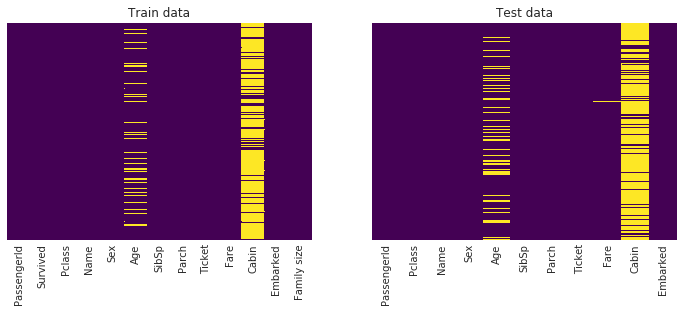

In [14]:
# use a heatmap to display the missing values in the data (in yellow)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax1)
ax1.set_title('Train data')
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax2)
ax2.set_title('Test data')

#### Note5

We can see that there are some values missing for the **Age** column, and most values are missing for the **Cabin** column. Although **Embarked** also has missing values, because there's only 2 of them missing, is not perceptible in this plot. The rest of the data looks clean, and the focus on cleaning the data should be on the **Age** and **Cabin** columns.